# Logistic Regression with MNIST

* [참고: TensorFlow.org](https://www.tensorflow.org/get_started/mnist/beginners)
* [소스: mnist_softmax.py in verion 1.4](https://github.com/tensorflow/tensorflow/blob/r1.4/tensorflow/examples/tutorials/mnist/mnist_softmax.py)

### Import modules

In [1]:
"""A very simple MNIST classifier.
See extensive documentation at
https://www.tensorflow.org/get_started/mnist/beginners in version 1.4
"""
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import time
import numpy as np

import tensorflow as tf

sess_config = tf.ConfigProto(gpu_options=tf.GPUOptions(allow_growth=True))

np.random.seed(219)
tf.set_random_seed(219)

### Import data

In [2]:
# Load training and eval data from tf.keras
(train_data, train_labels), (test_data, test_labels) = \
    tf.keras.datasets.mnist.load_data()

train_data = train_data / 255.
train_data = train_data.reshape(-1, 784)
train_labels = np.asarray(train_labels, dtype=np.int32)

test_data = test_data / 255.
test_data = test_data.reshape(-1, 784)
test_labels = np.asarray(test_labels, dtype=np.int32)

### Show the MNIST

label = 0


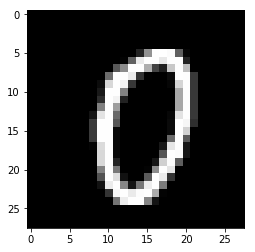

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = 1000
print("label = {}".format(train_labels[index]))
plt.imshow(train_data[index].reshape(28, 28), cmap='gray')
plt.show()

## Build a model

### Create placeholders for inputs and labels

In [4]:
# 여기를 직접 채워 넣으시면 됩니다.
# x, y는 배치 데이터를 받을 수 있는 placeholder
# x: inputs
x = tf.placeholder(tf.float32, name='x', shape=[None, 784])
# y: labels
y = tf.placeholder(tf.int32, name='y', shape=[None])

### Create weight and bias

In [5]:
# 여기를 직접 채워 넣으시면 됩니다.
# create Variables using `get_variable`
W = tf.get_variable(name='weight', shape=[784, 10],
                    initializer=tf.random_normal_initializer())
b = tf.get_variable(name='bias', shape=[10],
                    initializer=tf.zeros_initializer())

### Build a model: $y = Wx + b$

In [6]:
# 여기를 직접 채워 넣으시면 됩니다.
y_pred = tf.matmul(x, W) + b

### Define loss function

* [`tf.nn.softmax_cross_entropy_with_logits_v2`](https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits_v2)
* [`tf.losses.softmax_cross_entropy`](https://www.tensorflow.org/api_docs/python/tf/losses/softmax_cross_entropy)

In [7]:
# 출처: TensorFlow 공식 문서
# The raw formulation of cross-entropy,
#
#   tf.reduce_mean(-tf.reduce_sum(y * tf.log(tf.nn.softmax(y_pred)),
#                                 reduction_indices=[1]))
#
# can be numerically unstable.
#
# So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
# outputs of 'y', and then average across the batch.
y_one_hot = tf.one_hot(y, depth=10)
cross_entropy = tf.losses.softmax_cross_entropy(onehot_labels=y_one_hot,
                                                logits=y_pred)

### Create a optimizer

In [8]:
train_op = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

### `tf.Session()` and train

In [9]:
batch_size = 32

sess = tf.Session(config=sess_config)
sess.run(tf.global_variables_initializer())

num_batches_per_epoch = int(len(train_data) / batch_size)
print("num_batches_per_epoch {}".format(num_batches_per_epoch))

max_epochs = 1 # Train for only ten epochs
losses = []
start_time = time.time()
for epoch in range(max_epochs):
  # 여기를 직접 채워 넣으시면 됩니다.
  batch_index = np.random.permutation(len(train_data))
  for step in range(num_batches_per_epoch):
    # 여기를 직접 채워 넣으시면 됩니다.
    # train_data, train_labels의 인덱스를 잘 설정해보세요.
    batch_xs = train_data[step*batch_size:(step+1)*batch_size]
    batch_ys = train_labels[step*batch_size:(step+1)*batch_size]
    _, loss = sess.run([train_op, cross_entropy],
                       feed_dict={x: batch_xs, y: batch_ys})
    losses.append(loss)
  
    if step % 100 == 0:
      print("step: {}, loss: {}".format(step, loss))
    
print('training done!')
print("Elapsed time: {}".format(time.time() - start_time))

num_batches_per_epoch 1875
step: 0, loss: 20.411300659179688
step: 100, loss: 0.8186461925506592
step: 200, loss: 0.5676659941673279
step: 300, loss: 0.6220453381538391
step: 400, loss: 0.7941129803657532
step: 500, loss: 0.5649630427360535
step: 600, loss: 0.6956238746643066
step: 700, loss: 0.5315375328063965
step: 800, loss: 0.6670381426811218
step: 900, loss: 0.1328665167093277
step: 1000, loss: 0.8226040601730347
step: 1100, loss: 0.6190036535263062
step: 1200, loss: 0.46451497077941895
step: 1300, loss: 0.746595561504364
step: 1400, loss: 0.40039700269699097
step: 1500, loss: 0.7575790882110596
step: 1600, loss: 0.6816705465316772
step: 1700, loss: 0.15428262948989868
step: 1800, loss: 0.3819967210292816
training done!
Elapsed time: 2.1149678230285645


### Plot the loss funtion

In [ ]:
plt.plot(losses, label='loss')
plt.legend()
plt.show()

### Test trained model

* test accuracy: 0.8893

In [ ]:
correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y, tf.int64))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: test_data,
                                    y: test_labels}))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

test_batch_size = 16
batch_index = np.random.choice(len(test_data), size=test_batch_size, replace=False)
batch_xs = test_data[batch_index]
y_pred_ = sess.run(y_pred, feed_dict={x: batch_xs})

fig = plt.figure(figsize=(16, 10))
for i, (px, py) in enumerate(zip(batch_xs, y_pred_)):
  p = fig.add_subplot(4, 8, i+1)
  p.set_title("y_pred: {}".format(np.argmax(py)))
  p.imshow(px.reshape(28, 28), cmap='gray')
  p.axis('off')